# Census Bureau Part

#### We have added gross rent, household income and year household moved in, from Census. These attributes were added to understand the behavioral aspects and whether it affect the accuracy or not. 

#### We have taken ACS 5 Year estimates data  from American Community Survey and also data from United States Census. 




### Importing the property data with census tract added and meging it with our dataset.

In [80]:
dfp = pd.read_csv(pathb+'property_profile bbl.csv',encoding= 'windows-1252')
dfp.head()

dfp = dfp.rename(columns={'Bin':'BIN'})
dfp["BIN"] = dfp["BIN"].astype(str)

dfa = df.drop_duplicates(['BIN']).reset_index(drop=True)
df_census = pd.merge(dfa,dfp,how='left',on='BIN')
df_census.head()

,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,Previous Violation,CB2010,CT2010,BCTCB2010,Block_x,Lot_x,Borough Digit_x,Block_y,Lot_y,Borough Digit_y
0,1000003,101.0,0,1,1,0,0,0,0,0,...,0,1025.0,900.0,1.000900e+10,00002,0002,1,2.0,2.0,1.0
1,1000004,101.0,0,0,0,0,0,0,0,1,...,0,1003.0,31900.0,1.031900e+10,00003,0010,1,3.0,10.0,1.0
2,1000008,101.0,0,1,0,1,0,0,0,0,...,0,1016.0,900.0,1.000900e+10,00007,0027,1,7.0,27.0,1.0
3,1000009,101.0,0,1,0,1,0,0,0,0,...,0,1016.0,900.0,1.000900e+10,00007,0028,1,7.0,28.0,1.0
4,1000012,101.0,0,1,0,1,0,0,0,0,...,0,1016.0,900.0,1.000900e+10,00007,0031,1,7.0,31.0,1.0


In [85]:
#df_census = df_census.drop('Block_x',1)
#df_census = df_census.drop('Lot_x',1)
df_census = df_census.drop('Borough Digit_x',1)

df_census = df_census.rename(columns={'Block_y':'Block','Lot_y':'Lot','Borough Digit_y':'Borough Digit'})

df_census.head()

,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,ECB,Outcome,Flag,Previous Violation,CB2010,CT2010,BCTCB2010,Block,Lot,Borough Digit
0,1000003,101.0,0,1,1,0,0,0,0,0,...,0,0,0,0,1025.0,900.0,1.000900e+10,2.0,2.0,1.0
1,1000004,101.0,0,0,0,0,0,0,0,1,...,0,0,0,0,1003.0,31900.0,1.031900e+10,3.0,10.0,1.0
2,1000008,101.0,0,1,0,1,0,0,0,0,...,0,0,0,0,1016.0,900.0,1.000900e+10,7.0,27.0,1.0
3,1000009,101.0,0,1,0,1,0,0,0,0,...,0,0,0,0,1016.0,900.0,1.000900e+10,7.0,28.0,1.0
4,1000012,101.0,0,1,0,1,0,0,0,0,...,1,1,0,0,1016.0,900.0,1.000900e+10,7.0,31.0,1.0


In [87]:
##Create BBL
pd.set_option('chained_assignment', None)
# Convert Block and Lot to String.Borough has alreday been done. 
df_census["Block"] = df_census["Block"].astype(str)
df_census["Lot"] = df_census["Lot"].astype(str)
df_census["Borough Digit"] = df_census["Borough Digit"].astype(str)


#Strip white space from leading and trailing edge
df_census["Block"] = df_census["Block"].map(str.strip)
df_census["Lot"] = df_census["Lot"].map(str.strip)

df_census['Block'] = df_census['Block'].str.split(".").str[0]
df_census['Lot'] = df_census['Lot'].str.split(".").str[0]
df_census['Borough Digit'] = df_census['Borough Digit'].str.split(".").str[0]



#Create BBL

# Add 0s to block, maximux 5 digit. 
for i in range(0,len(df_census)):
    if len(df_census["Block"][i]) == 1:
        df_census["Block"][i] = "0000" + df_census["Block"][i]
    if len(df_census["Block"][i]) == 2:
        df_census["Block"][i] = "000" + df_census["Block"][i]
    if len(df_census["Block"][i]) == 3:
        df_census["Block"][i] = "00" + df_census["Block"][i]
    if len(df_census["Block"][i]) == 4:
        df_census["Block"][i] = "0" + df_census["Block"][i]
        

# Add 0s to Lot, maximum 4 digit.
    if len(df_census["Lot"][i]) == 1:
        df_census["Lot"][i] = "000" + df_census["Lot"][i]
    if len(df_census["Lot"][i]) == 2:
        df_census["Lot"][i] = "00" + df_census["Lot"][i]
    if len(df_census["Lot"][i]) == 3:
        df_census["Lot"][i] = "0" + df_census["Lot"][i]
        
df_census["BBL"] = df_census["Borough Digit"] + df_census["Block"] + df_census["Lot"]
df_census.head()

,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,Outcome,Flag,Previous Violation,CB2010,CT2010,BCTCB2010,Block,Lot,Borough Digit,BBL
0,1000003,101.0,0,1,1,0,0,0,0,0,...,0,0,0,1025.0,900.0,1.000900e+10,00002,0002,1,1000020002
1,1000004,101.0,0,0,0,0,0,0,0,1,...,0,0,0,1003.0,31900.0,1.031900e+10,00003,0010,1,1000030010
2,1000008,101.0,0,1,0,1,0,0,0,0,...,0,0,0,1016.0,900.0,1.000900e+10,00007,0027,1,1000070027
3,1000009,101.0,0,1,0,1,0,0,0,0,...,0,0,0,1016.0,900.0,1.000900e+10,00007,0028,1,1000070028
4,1000012,101.0,0,1,0,1,0,0,0,0,...,1,0,0,1016.0,900.0,1.000900e+10,00007,0031,1,1000070031


##  PLUTO PROPERTY DATA

### Retrieve pluto property data with census tract added.

In [55]:

pluto = pd.read_csv(path+'pluto_20v1.csv',low_memory ='False')
pluto =pluto[["bbl","ct2010","cb2010","tract2010"]]
pluto = pluto.sort_values('bbl').reset_index(drop=True)
pluto.head()

,bbl,ct2010,cb2010,tract2010
0,10530,55.02,1001.0,5502.0
1,1000010010,5.00,1027.0,5.0
2,1000010101,1.00,1001.0,1.0
3,1000010201,1.00,1000.0,1.0
4,1000010301,317.03,1.0,31703.0


In [90]:
pluto = pluto.rename(columns={'bbl':'BBL'})
pluto["BBL"] = pluto["BBL"].astype(str)
df_census["BBL"] = df_census["BBL"].astype(str)

data = pd.merge(df_census,pluto,how='left',on='BBL')
data.head()

,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,CB2010,CT2010,BCTCB2010,Block,Lot,Borough Digit,BBL,ct2010,cb2010,tract2010
0,1000003,101.0,0,1,1,0,0,0,0,0,...,1025.0,900.0,1.000900e+10,00002,0002,1,1000020002,9.0,1025.0,9.0
1,1000004,101.0,0,0,0,0,0,0,0,1,...,1003.0,31900.0,1.031900e+10,00003,0010,1,1000030010,319.0,1003.0,319.0
2,1000008,101.0,0,1,0,1,0,0,0,0,...,1016.0,900.0,1.000900e+10,00007,0027,1,1000070027,9.0,1016.0,9.0
3,1000009,101.0,0,1,0,1,0,0,0,0,...,1016.0,900.0,1.000900e+10,00007,0028,1,1000070028,9.0,1016.0,9.0
4,1000012,101.0,0,1,0,1,0,0,0,0,...,1016.0,900.0,1.000900e+10,00007,0031,1,1000070031,9.0,1016.0,9.0


In [97]:
data.to_csv(path+'Census Tract BBL.csv')

In [44]:
import numpy as np
import pandas as pd
path = "C:\\Users\\TahAlam\\Documents\\Facade Safety\\"

data = pd.read_csv(path+'Census Tract BBL.csv')
data.head()

,Unnamed: 0,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,...,CB2010,CT2010,BCTCB2010,Block,Lot,Borough Digit,BBL,ct2010,cb2010,tract2010
0,0,1000003,101.0,0,1,1,0,0,0,0,...,1025.0,900.0,1.000900e+10,2,2,1.0,1000020002,9.0,1025.0,9.0
1,1,1000004,101.0,0,0,0,0,0,0,0,...,1003.0,31900.0,1.031900e+10,3,10,1.0,1000030010,319.0,1003.0,319.0
2,2,1000008,101.0,0,1,0,1,0,0,0,...,1016.0,900.0,1.000900e+10,7,27,1.0,1000070027,9.0,1016.0,9.0
3,3,1000009,101.0,0,1,0,1,0,0,0,...,1016.0,900.0,1.000900e+10,7,28,1.0,1000070028,9.0,1016.0,9.0
4,4,1000012,101.0,0,1,0,1,0,0,0,...,1016.0,900.0,1.000900e+10,7,31,1.0,1000070031,9.0,1016.0,9.0


### Add borough code with  with census tract  for uniquely identifying them.

In [51]:
data = data.drop('Unnamed: 0',1)
data["Borough Digit"] = data["Borough Digit"].astype(str).replace('\.0', '', regex=True)
data['Borough Code'] = pd.np.where(data["Borough Digit"].str.contains("1"), "MN",
                        pd.np.where(data["Borough Digit"].str.contains("2"), "BX",
                        pd.np.where(data["Borough Digit"].str.contains("3"), "BK",
                        pd.np.where(data["Borough Digit"].str.contains("4"), "QN",
                        pd.np.where(data["Borough Digit"].str.contains("5"),"5", "SI")))))
data["Borough Code"] = data["Borough Code"].str.replace("5","SI")
data.head()

,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,CT2010,BCTCB2010,Block,Lot,Borough Digit,BBL,ct2010,cb2010,tract2010,Borough Code
0,1000003,101.0,0,1,1,0,0,0,0,0,...,900.0,1.000900e+10,2,2,1,1000020002,9.0,1025.0,9.0,MN
1,1000004,101.0,0,0,0,0,0,0,0,1,...,31900.0,1.031900e+10,3,10,1,1000030010,319.0,1003.0,319.0,MN
2,1000008,101.0,0,1,0,1,0,0,0,0,...,900.0,1.000900e+10,7,27,1,1000070027,9.0,1016.0,9.0,MN
3,1000009,101.0,0,1,0,1,0,0,0,0,...,900.0,1.000900e+10,7,28,1,1000070028,9.0,1016.0,9.0,MN
4,1000012,101.0,0,1,0,1,0,0,0,0,...,900.0,1.000900e+10,7,31,1,1000070031,9.0,1016.0,9.0,MN


In [57]:
data["ct2010"] = data["ct2010"].map('{0:g}'.format) ## Only takes off 0 zero from single int/number
data.tail(30)
data["ct2010"] = data["Borough Code"] +data["ct2010"] 
data.tail()

,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,CT2010,BCTCB2010,Block,Lot,Borough Digit,BBL,ct2010,cb2010,tract2010,Borough Code
304506,5038357,502.0,0,0,0,0,1,0,0,0,...,27706.0,5.027706e+10,2380,110,5,5023800110,SI277.06,1009.0,27706.0,SI
304507,5038358,502.0,0,0,0,0,0,0,0,0,...,27706.0,5.027706e+10,2380,115,5,5023800115,SI277.06,1009.0,27706.0,SI
304508,5038361,502.0,0,0,0,0,0,0,0,0,...,NaN,NaN,2380,455,5,5023800455,SInan,NaN,NaN,SI
304509,5038363,502.0,0,0,0,1,0,0,0,0,...,NaN,NaN,2380,500,5,5023800500,SI277.06,3000.0,27706.0,SI
304510,5038364,502.0,0,0,0,1,0,0,0,0,...,27706.0,5.027706e+10,2380,550,5,5023800550,SI277.06,3000.0,27706.0,SI


In [33]:
##
path = "C:\\Users\\TahAlam\\Documents\\Facade Safety\\"
data = pd.read_csv(path+'ct2010 data with estimator(300k).csv')
data = data.drop('Unnamed: 0',1)
data = data.drop('Estimate!!Median year householder moved into unit!!Total',1)
data = data.drop('Median income (dollars)!!Estimate!!Households',1)
data = data.drop('Estimate; Median gross rent',1)
data.head()

,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,CT2010,BCTCB2010,Block,Lot,Borough Digit,BBL,ct2010,cb2010,tract2010,Borough Code
0,1000003,101.0,0,1,1,0,0,0,0,0,...,900.0,1.000900e+10,2,2,1.0,1000020002,MN9,1025.0,9.0,MN
1,1000004,101.0,0,0,0,0,0,0,0,1,...,31900.0,1.031900e+10,3,10,1.0,1000030010,MN319,1003.0,319.0,MN
2,1000008,101.0,0,1,0,1,0,0,0,0,...,900.0,1.000900e+10,7,27,1.0,1000070027,MN9,1016.0,9.0,MN
3,1000009,101.0,0,1,0,1,0,0,0,0,...,900.0,1.000900e+10,7,28,1.0,1000070028,MN9,1016.0,9.0,MN
4,1000012,101.0,0,1,0,1,0,0,0,0,...,900.0,1.000900e+10,7,31,1.0,1000070031,MN9,1016.0,9.0,MN


### Census Bureau data Gross Rent

In [34]:
#data = data.drop('Unnamed: 0',1)
pathb = "C:\\Users\\TahAlam\\Documents\\Facade Safety\\Census Data\\"
rent = pd.read_csv(pathb+'Gross Rent by Tracts.csv')
rent["Estimate; Median gross rent"] = rent["Estimate; Median gross rent"].replace('-','0')
rent["Estimate; Median gross rent"] = rent["Estimate; Median gross rent"].replace('3,500+','3500+')

rent['Borough Code'] = pd.np.where(rent["Geography"].str.contains("New York County, New York"), "MN",
                        pd.np.where(rent["Geography"].str.contains("Bronx County, New York"), "BX",
                        pd.np.where(rent["Geography"].str.contains("Kings County, New York"), "BK",
                        pd.np.where(rent["Geography"].str.contains("Queens County, New York"), "QN",
                        pd.np.where(rent["Geography"].str.contains("Richmond County, New York"),"Richmond County, New York", "SI")))))
rent.head()

,Id,Id2,Geography,Estimate; Median gross rent,Margin of Error; Median gross rent,Borough Code
0,1400000US36005000100,36005000100,"Census Tract 1, Bronx County, New York",0,**,BX
1,1400000US36005000200,36005000200,"Census Tract 2, Bronx County, New York",1250,402,BX
2,1400000US36005000400,36005000400,"Census Tract 4, Bronx County, New York",1278,207,BX
3,1400000US36005001600,36005001600,"Census Tract 16, Bronx County, New York",989,53,BX
4,1400000US36005001900,36005001900,"Census Tract 19, Bronx County, New York",1181,78,BX


In [35]:
rent["Borough Code"] = rent["Borough Code"].replace('Richmond County, New York',"SI")
#rent["Borough Code"].value_counts()
rent['ct2010'] = rent['Geography'].str.replace(r'[^0-9]+', '')
rent['ct2010'] = rent['Geography'].str.replace(r'[^\d.]+', '')
rent["ct2010"] = rent["Borough Code"] + rent["ct2010"]
rent.head()

,Id,Id2,Geography,Estimate; Median gross rent,Margin of Error; Median gross rent,Borough Code,ct2010
0,1400000US36005000100,36005000100,"Census Tract 1, Bronx County, New York",0,**,BX,BX1
1,1400000US36005000200,36005000200,"Census Tract 2, Bronx County, New York",1250,402,BX,BX2
2,1400000US36005000400,36005000400,"Census Tract 4, Bronx County, New York",1278,207,BX,BX4
3,1400000US36005001600,36005001600,"Census Tract 16, Bronx County, New York",989,53,BX,BX16
4,1400000US36005001900,36005001900,"Census Tract 19, Bronx County, New York",1181,78,BX,BX19


In [36]:
## Merge with data
data["ct2010"] = data["ct2010"].astype(str)
rent["ct2010"] = rent["ct2010"].astype(str)


data = pd.merge(data,rent[["ct2010","Estimate; Median gross rent"]],how='left',on='ct2010')
data.head()

,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,BCTCB2010,Block,Lot,Borough Digit,BBL,ct2010,cb2010,tract2010,Borough Code,Estimate; Median gross rent
0,1000003,101.0,0,1,1,0,0,0,0,0,...,1.000900e+10,2,2,1.0,1000020002,MN9,1025.0,9.0,MN,3500+
1,1000004,101.0,0,0,0,0,0,0,0,1,...,1.031900e+10,3,10,1.0,1000030010,MN319,1003.0,319.0,MN,0
2,1000008,101.0,0,1,0,1,0,0,0,0,...,1.000900e+10,7,27,1.0,1000070027,MN9,1016.0,9.0,MN,3500+
3,1000009,101.0,0,1,0,1,0,0,0,0,...,1.000900e+10,7,28,1.0,1000070028,MN9,1016.0,9.0,MN,3500+
4,1000012,101.0,0,1,0,1,0,0,0,0,...,1.000900e+10,7,31,1.0,1000070031,MN9,1016.0,9.0,MN,3500+


### Median Year Household Moved

In [37]:
house = pd.read_csv(pathb+'Median Year Household Moved 2015.csv')

house["Estimate!!Median year householder moved into unit!!Total"] = house["Estimate!!Median year householder moved into unit!!Total"].str.replace('-','0')


house['Borough Code'] = pd.np.where(house["Geographic Area Name"].str.contains("New York County, New York"), "MN",
                        pd.np.where(house["Geographic Area Name"].str.contains("Bronx County, New York"), "BX",
                        pd.np.where(house["Geographic Area Name"].str.contains("Kings County, New York"), "BK",
                        pd.np.where(house["Geographic Area Name"].str.contains("Queens County, New York"), "QN",
                        pd.np.where(house["Geographic Area Name"].str.contains("Richmond County, New York"),"Richmond County, New York", "OTHER")))))


house["Borough Code"] = house["Borough Code"].replace('Richmond County, New York',"SI")

house['ct2010'] = house['Geographic Area Name'].str.replace(r'[^0-9]+', '')
house['ct2010'] = house['Geographic Area Name'].str.replace(r'[^\d.]+', '')
house["ct2010"] = house["Borough Code"] + house["ct2010"]

house.head()

,id,Geographic Area Name,Estimate!!Median year householder moved into unit!!Total,Margin of Error!!Median year householder moved into unit!!Total,Estimate!!Median year householder moved into unit!!Owner occupied,Margin of Error!!Median year householder moved into unit!!Owner occupied,Estimate!!Median year householder moved into unit!!Renter occupied,Margin of Error!!Median year householder moved into unit!!Renter occupied,Borough Code,ct2010
0,1400000US36061018800,"Census Tract 188, New York County, New York",2008,2,-,**,2009,2,MN,MN188
1,1400000US36061019200,"Census Tract 192, New York County, New York",2001,2,-,**,2001,3,MN,MN192
2,1400000US36061019600,"Census Tract 196, New York County, New York",2005,2,-,**,2005,2,MN,MN196
3,1400000US36061019701,"Census Tract 197.01, New York County, New York",2011,2,-,**,2011,2,MN,MN197.01
4,1400000US36061021200,"Census Tract 212, New York County, New York",2007,2,-,**,2007,2,MN,MN212


In [38]:
house["Borough Code"].value_counts()

OTHER    2751
BK        761
QN        669
BX        339
MN        288
SI        110
Name: Borough Code, dtype: int64

In [22]:
house.to_csv(path+'test.csv')

In [39]:
### MERGE 
#data= data.drop('Estimate; Median year householder moved into unit -- - Total:_x',1)
#data= data.drop('Estimate; Median year householder moved into unit -- - Total:_y',1)

house["ct2010"] = house["ct2010"].astype(str)


data = pd.merge(data,house[["ct2010","Estimate!!Median year householder moved into unit!!Total"]],how='left',on='ct2010')
data.head()


,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,Block,Lot,Borough Digit,BBL,ct2010,cb2010,tract2010,Borough Code,Estimate; Median gross rent,Estimate!!Median year householder moved into unit!!Total
0,1000003,101.0,0,1,1,0,0,0,0,0,...,2,2,1.0,1000020002,MN9,1025.0,9.0,MN,3500+,2012
1,1000004,101.0,0,0,0,0,0,0,0,1,...,3,10,1.0,1000030010,MN319,1003.0,319.0,MN,0,0
2,1000008,101.0,0,1,0,1,0,0,0,0,...,7,27,1.0,1000070027,MN9,1016.0,9.0,MN,3500+,2012
3,1000009,101.0,0,1,0,1,0,0,0,0,...,7,28,1.0,1000070028,MN9,1016.0,9.0,MN,3500+,2012
4,1000012,101.0,0,1,0,1,0,0,0,0,...,7,31,1.0,1000070031,MN9,1016.0,9.0,MN,3500+,2012


In [40]:
len(data)

304511

In [87]:
data.to_csv(pathb+'Census bin data.csv')

### Median Household Yearly Income 

In [41]:
import numpy as np
import pandas as pd

pathb = "C:\\Users\\TahAlam\\Documents\\Facade Safety\\Census Data\\"

income = pd.read_csv(pathb+'Median Household Income 2016.csv')
income.head()


income["Median income (dollars)!!Estimate!!Households"] = income["Median income (dollars)!!Estimate!!Households"].str.replace('-','0')


income['Borough Code'] = pd.np.where(income["Geographic Area Name"].str.contains("New York County, New York"), "MN",
                        pd.np.where(income["Geographic Area Name"].str.contains("Bronx County, New York"), "BX",
                        pd.np.where(income["Geographic Area Name"].str.contains("Kings County, New York"), "BK",
                        pd.np.where(income["Geographic Area Name"].str.contains("Queens County, New York"), "QN",
                        pd.np.where(income["Geographic Area Name"].str.contains("Richmond County, New York"),"Richmond County, New York", "OTHER")))))


income["Borough Code"] = income["Borough Code"].replace('Richmond County, New York',"SI")

income['ct2010'] = income['Geographic Area Name'].str.replace(r'[^0-9]+', '')
income['ct2010'] = income['Geographic Area Name'].str.replace(r'[^\d.]+', '')
income["ct2010"] = income["Borough Code"] + income["ct2010"]

income.head()

,id,Geographic Area Name,Total!!Estimate!!Households,Total!!Margin of Error!!Households,Total!!Estimate!!Households!!One race!!White,Total!!Margin of Error!!Households!!One race!!White,Total!!Estimate!!Households!!One race!!Black or African American,Total!!Margin of Error!!Households!!One race!!Black or African American,Total!!Estimate!!Households!!One race!!American Indian and Alaska Native,Total!!Margin of Error!!Households!!One race!!American Indian and Alaska Native,...,Median income (dollars)!!Estimate!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone,Median income (dollars)!!Margin of Error!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone,Median income (dollars)!!Estimate!!PERCENT ALLOCATED!!Household income in the past 12 months,Median income (dollars)!!Margin of Error!!PERCENT ALLOCATED!!Household income in the past 12 months,Median income (dollars)!!Estimate!!PERCENT ALLOCATED!!Family income in the past 12 months,Median income (dollars)!!Margin of Error!!PERCENT ALLOCATED!!Family income in the past 12 months,Median income (dollars)!!Estimate!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Median income (dollars)!!Margin of Error!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Borough Code,ct2010
0,1400000US36055011707,"Census Tract 117.07, Monroe County, New York",2451,76,95.2,2.9,0.7,1,0,1.2,...,98875,56354,(X),(X),(X),(X),(X),(X),OTHER,OTHER117.07
1,1400000US36055011708,"Census Tract 117.08, Monroe County, New York",1317,59,94.7,3,0.8,1.3,0,2.2,...,-,**,(X),(X),(X),(X),(X),(X),OTHER,OTHER117.08
2,1400000US36055011800,"Census Tract 118, Monroe County, New York",2502,174,97,2.1,0,1.2,0,1.2,...,115197,48763,(X),(X),(X),(X),(X),(X),OTHER,OTHER118
3,1400000US36055011901,"Census Tract 119.01, Monroe County, New York",2685,66,89.2,5.1,2.7,3.2,0.3,0.6,...,90313,48391,(X),(X),(X),(X),(X),(X),OTHER,OTHER119.01
4,1400000US36055011902,"Census Tract 119.02, Monroe County, New York",2523,106,98.2,1.6,0.7,1.1,0,1.2,...,-,**,(X),(X),(X),(X),(X),(X),OTHER,OTHER119.02


In [55]:
income.to_csv(path+'test.csv')

In [42]:
###MERGE
#data = data.drop('Median income (dollars)!!Estimate!!Households',1)
income["ct2010"] = income["ct2010"].astype(str)


data = pd.merge(data,income[["ct2010","Median income (dollars)!!Estimate!!Households"]],how='left',on='ct2010')
data.head()



,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,Lot,Borough Digit,BBL,ct2010,cb2010,tract2010,Borough Code,Estimate; Median gross rent,Estimate!!Median year householder moved into unit!!Total,Median income (dollars)!!Estimate!!Households
0,1000003,101.0,0,1,1,0,0,0,0,0,...,2,1.0,1000020002,MN9,1025.0,9.0,MN,3500+,2012,158125
1,1000004,101.0,0,0,0,0,0,0,0,1,...,10,1.0,1000030010,MN319,1003.0,319.0,MN,0,0,0
2,1000008,101.0,0,1,0,1,0,0,0,0,...,27,1.0,1000070027,MN9,1016.0,9.0,MN,3500+,2012,158125
3,1000009,101.0,0,1,0,1,0,0,0,0,...,28,1.0,1000070028,MN9,1016.0,9.0,MN,3500+,2012,158125
4,1000012,101.0,0,1,0,1,0,0,0,0,...,31,1.0,1000070031,MN9,1016.0,9.0,MN,3500+,2012,158125


In [43]:
len(data)

304511

In [73]:
data.to_csv(path+'ct2010 data with estimator(300k).csv')

## Merge with Base Dataset

In [44]:
#MERGE With base dataset
import pandas as pd
import numpy as np

path = "C:\\Users\\TahAlam\\Documents\\Facade Safety\\"
df = pd.read_csv(path+'base dataset(3m) no census estimator.csv')
print(len(df))
#data = pd.read_csv(path+'ct2010 data with estimator(300k).csv')
df = pd.merge(df,data[["BIN","ct2010","Estimate!!Median year householder moved into unit!!Total",
                "Estimate; Median gross rent","Median income (dollars)!!Estimate!!Households"]],
                how='left',on='BIN')
print(len(df))
df.head()

3065010
3065010


,Unnamed: 0,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,...,BIN-Year,DOB,ECB,Outcome,Flag,Previous Violation,ct2010,Estimate!!Median year householder moved into unit!!Total,Estimate; Median gross rent,Median income (dollars)!!Estimate!!Households
0,0,1000003,101.0,0,1,1,0,0,0,0,...,1000003_2010,0,0,0,0,0,MN9,2012,3500+,158125
1,1,1000004,101.0,0,0,0,0,0,0,0,...,1000004_2010,0,0,0,0,0,MN319,0,0,0
2,2,1000008,101.0,0,1,0,1,0,0,0,...,1000008_2010,0,0,0,0,0,MN9,2012,3500+,158125
3,3,1000009,101.0,0,1,0,1,0,0,0,...,1000009_2010,0,0,0,0,0,MN9,2012,3500+,158125
4,4,1000012,101.0,0,1,0,1,0,0,0,...,1000012_2010,0,1,1,0,0,MN9,2012,3500+,158125


In [17]:
df = df.drop('Unnamed: 0',1)

df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].astype(str)

df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].replace('3500+','3500')

df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].replace('Nan','0')

df["Estimate; Median year householder moved into unit -- - Total:"] = df["Estimate; Median year householder moved into unit -- - Total:"].replace('2010+','2010')

df["Estimate; Median year householder moved into unit -- - Total:"] = df["Estimate; Median year householder moved into unit -- - Total:"].replace('Nan','0')

#df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].astype(int)

#df.hist(column='Estimate; Median gross rent')

#df.head()

### Histogram & Datatype Convert

In [50]:
#df = df.drop('Unnamed: 0',1)
df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].replace('nan','0')
df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].replace('3500+','3500')
df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].astype(str).replace('\.0', '', regex=True)

Text(0.5, 0, 'Gross Rent')

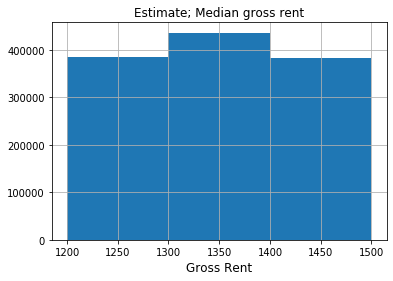

In [52]:
import matplotlib.pyplot as plt
#df = df.drop('Unnamed: 0',1)
#df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].str.replace('nan','0')
#df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].replace('3500+','3500')
#df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].astype(str).replace('\.0', '', regex=True)

df["Estimate; Median gross rent"] = df["Estimate; Median gross rent"].astype(int)
#df["Estimate; Median gross rent"] = pd.to_numeric(df["Estimate; Median gross rent"], errors='coerce')

df.hist(column='Estimate; Median gross rent', bins =[1200,1300,1400,1500])
plt.xlabel("Gross Rent", fontsize=12)

In [51]:
df["Estimate; Median gross rent"].value_counts().nlargest(20)

0       294170
1476     14920
1492     13570
1317     12750
1391     12500
1278     12210
1362     12140
1921     12140
1500     11770
1403     11680
1314     11520
1574     11380
1341     11020
1282     11010
1354     10860
1309     10660
1202     10390
1493     10270
1576     10200
1618     10090
Name: Estimate; Median gross rent, dtype: int64

In [56]:
df["Estimate!!Median year householder moved into unit!!Total"] = df["Estimate!!Median year householder moved into unit!!Total"].replace('nan','0')
df["Estimate!!Median year householder moved into unit!!Total"] = df["Estimate!!Median year householder moved into unit!!Total"].astype(str).replace('\.0', '', regex=True)


Text(0.5, 0, 'Median Year Moved In')

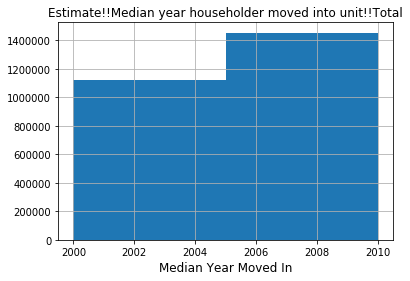

In [58]:
#df["Estimate!!Median year householder moved into unit!!Total"] = df["Estimate!!Median year householder moved into unit!!Total"].replace('nan','0')
#df["Estimate!!Median year householder moved into unit!!Total"] = df["Estimate!!Median year householder moved into unit!!Total"].astype(str).replace('\.0', '', regex=True)

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
df["Estimate!!Median year householder moved into unit!!Total"] = df["Estimate!!Median year householder moved into unit!!Total"].astype(int)
#df["Estimate; Median gross rent"] = pd.to_numeric(df["Estimate; Median gross rent"], errors='coerce')

df.hist(column='Estimate!!Median year householder moved into unit!!Total',bins=[2000,2005,2010,2010])
plt.xlabel("Median Year Moved In", fontsize=12)

In [57]:
df["Estimate!!Median year householder moved into unit!!Total"].value_counts()

2005    527560
2006    436120
2004    379420
2003    321370
2007    305930
0       295460
2002    198450
2001    135000
2008     97380
2009     85800
2000     84010
2010     74400
1999     45080
1998     20860
1997     14270
2011     13280
2012     12930
1996      7660
1995      4100
1992      1900
1994      1660
1993      1090
1989       740
1991       290
1990       200
1988        50
Name: Estimate!!Median year householder moved into unit!!Total, dtype: int64

In [75]:
df["Median income (dollars)!!Estimate!!Households"] = df["Median income (dollars)!!Estimate!!Households"].replace('nan','0')
df["Median income (dollars)!!Estimate!!Households"] = df["Median income (dollars)!!Estimate!!Households"].replace('250,000+','250000')
df["Median income (dollars)!!Estimate!!Households"] = df["Median income (dollars)!!Estimate!!Households"].astype(str).replace('\.0', '', regex=True)

Text(0.5, 0, 'Median Household Income')

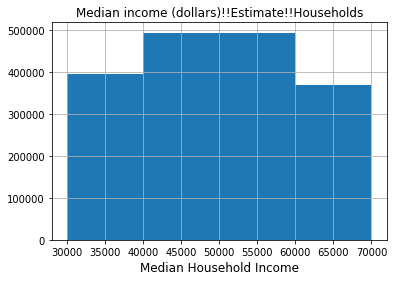

In [76]:
#df["Median income (dollars)!!Estimate!!Households"] = df["Median income (dollars)!!Estimate!!Households"].replace('nan','0')
#df["Median income (dollars)!!Estimate!!Households"] = df["Median income (dollars)!!Estimate!!Households"].replace('250,000+','250000')

#df["Median income (dollars)!!Estimate!!Households"] = df["Median income (dollars)!!Estimate!!Households"].astype(str).replace('\.0', '', regex=True)

df["Median income (dollars)!!Estimate!!Households"] = df["Median income (dollars)!!Estimate!!Households"].astype(int)

df.hist(column='Median income (dollars)!!Estimate!!Households',bins=[30000,40000,50000,60000,70000])
plt.xlabel("Median Household Income", fontsize=12)

In [77]:
df["Median income (dollars)!!Estimate!!Households"].value_counts()

0        281850
88899     14920
77468     10640
67891      9280
81058      8800
          ...  
98722        10
17000        10
65909        10
63368        10
86786        10
Name: Median income (dollars)!!Estimate!!Households, Length: 1946, dtype: int64

## Convert Census data to Categorical 

In [78]:
def rent_cat(x):
    """Creates gross rent categorical variable"""
    if x == 0:
        return "NAN"
    if x > 0 and x <= 1300:
        return "Low"
    if x > 1300 and x <= 1500:
        return "Medium_Low"
    if x > 1500 and x <= 2000:
        return "Medium_High"
    if x > 2000:
        return "High"

    
df['Rent Category'] = df['Estimate; Median gross rent'].apply(rent_cat) 
df['Rent Category'].value_counts()

Low            950460
Medium_Low     810390
Medium_High    699720
High           310270
NAN            294170
Name: Rent Category, dtype: int64

In [79]:
def yearmove_cat(x):
    """Creates gross rent categorical variable"""
    if x == 0:
        return "NAN"
    if x > 0 and x <= 2000:
        return "1980_2000"
    if x > 2000 and x <= 2005:
        return "2001_2005"
    if x > 2005 and x <= 2010:
        return "2005_2010"
    if x > 2010:
        return "2010_2020"

    
df['Year Moved Category'] = df['Estimate!!Median year householder moved into unit!!Total'].apply(yearmove_cat) 
df['Year Moved Category'].value_counts()

2001_2005    1561800
2005_2010     999630
NAN           295460
1980_2000     181910
2010_2020      26210
Name: Year Moved Category, dtype: int64

In [80]:
def income_cat(x):
    """Creates gross rent categorical variable"""
    if x == 0:
        return "NAN"
    if x > 0 and x <= 40000:
        return "Low"
    if x > 40000 and x <= 60000:
        return "Medium_Low"
    if x > 60000 and x <= 90000:
        return "Medium_High"
    if x > 90000:
        return "High"

    
df['Median Income Category'] = df['Median income (dollars)!!Estimate!!Households'].apply(income_cat) 
df['Median Income Category'].value_counts()

Medium_Low     985580
Medium_High    761430
Low            695950
High           340200
NAN            281850
Name: Median Income Category, dtype: int64

## Create Dummy for Census Category

In [81]:
print ("Gross Rent type dummies ...")
print ("number of rent types", len(set(df["Rent Category"].tolist())))

grdummies = pd.get_dummies(df["Rent Category"], prefix='GR')
grdummies = grdummies.drop("GR_NAN", 1)

df = pd.concat([df, grdummies], axis=1)
df = df.drop('Rent Category', 1)

print ("Gross Year Moved dummies ...")
print ("number of year moved types", len(set(df["Year Moved Category"].tolist())))

ymdummies = pd.get_dummies(df["Year Moved Category"], prefix='YM')
ymdummies = ymdummies.drop("YM_NAN", 1)

df = pd.concat([df, ymdummies], axis=1)
df = df.drop('Year Moved Category', 1)

print ("Median Income dummies ...")
print ("number of income types", len(set(df["Median Income Category"].tolist())))

midummies = pd.get_dummies(df["Median Income Category"], prefix='MI')
midummies = midummies.drop("MI_NAN", 1)

df = pd.concat([df, midummies], axis=1)
df = df.drop('Median Income Category', 1)

print("DONE...")

df.head()


Gross Rent type dummies ...
number of rent types 5
Gross Year Moved dummies ...
number of year moved types 5
Median Income dummies ...
number of income types 5
DONE...


,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,GR_Medium_High,GR_Medium_Low,YM_1980_2000,YM_2001_2005,YM_2005_2010,YM_2010_2020,MI_High,MI_Low,MI_Medium_High,MI_Medium_Low
0,1000003,101.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1000004,101.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1000008,101.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1000009,101.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,1000012,101.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [84]:
df = df.drop('BIN-Year',1)
df = df.drop('DOB',1)
df = df.drop('ECB',1)
df = df.drop('Flag',1)
df = df.drop('ct2010',1)

df = df.drop('Estimate!!Median year householder moved into unit!!Total',1)
df = df.drop('Estimate; Median gross rent',1)
df = df.drop('Median income (dollars)!!Estimate!!Households',1)
df= df.reset_index(drop=True)
df.head()

,BIN,Community Board,Compliance Universe,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,...,GR_Medium_High,GR_Medium_Low,YM_1980_2000,YM_2001_2005,YM_2005_2010,YM_2010_2020,MI_High,MI_Low,MI_Medium_High,MI_Medium_Low
0,1000003,101.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1000004,101.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1000008,101.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1000009,101.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,1000012,101.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [130]:
df.to_csv(path+'base dataset(3m).csv')

In [139]:
df.dtypes

BIN                      int64
Community Board        float64
Compliance Universe      int64
Landmark Status          int64
CITY Owned Status        int64
                        ...   
YM_2010_2020             uint8
MI_High                  uint8
MI_Low                   uint8
MI_Medium_High           uint8
MI_Medium_Low            uint8
Length: 100, dtype: object

## Modeling

In [108]:
f = df.copy()
f = f.drop(['BIN','Community Board','Compliance Universe'],axis=1)


In [126]:
f.head()

,Landmark Status,CITY Owned Status,BT_Commercial,BT_Educational,BT_Government,BT_Medical,BT_Miscellaneous,BT_Residential,1900_1915,1916_1937,...,GR_Medium_High,GR_Medium_Low,YM_1980_2000,YM_2001_2005,YM_2005_2010,YM_2010_2020,MI_High,MI_Low,MI_Medium_High,MI_Medium_Low
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [127]:
## Create Balance Class
from sklearn.utils import resample
# Separate majority and minority classes
#f["Outcome"] = f["Outcome"].replace('\.0', '', regex=True)
#f["Outcome"] = f["Outcome"].astype(str)
#f["Outcome"] = pd.to_numeric(f["Outcome"], errors='coerce')

df_majority = f[f.Outcome==0]
df_minority = f[f.Outcome==1]

print ("Size of majority class", len(df_majority))
print ("Size of minority class", len(df_minority))

lenMajority = len(df_majority)*0.01
lenMajority= int(lenMajority)


# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=lenMajority, # to match majority class
                                 random_state=123) # reproducible results

print ("Size of minority class upsampled", len(df_minority_upsampled))


# Combine majority class with upsampled minority class
f2 = pd.concat([df_majority, df_minority_upsampled])
f2 = f2.reset_index(drop=True)
 
print ("Display new class counts")
f2.Outcome.value_counts()

print ("Randomly sort f2")
f2["Index"] = f2.index
f2 = f2.sample(frac=1)
f2 = f2.reset_index(drop=True)

Size of majority class 3061024
Size of minority class 3986
Size of minority class upsampled 30610
Display new class counts
Randomly sort f2


In [128]:
f2.dtypes[50:]

CB_305                int64
CB_306                int64
CB_307                int64
CB_308                int64
CB_309                int64
CB_310                int64
CB_311                int64
CB_312                int64
CB_313                int64
CB_314                int64
CB_315                int64
CB_316                int64
CB_317                int64
CB_318                int64
CB_355                int64
CB_401                int64
CB_402                int64
CB_403                int64
CB_404                int64
CB_405                int64
CB_406                int64
CB_407                int64
CB_408                int64
CB_409                int64
CB_410                int64
CB_411                int64
CB_412                int64
CB_413                int64
CB_414                int64
CB_481                int64
CB_483                int64
CB_501                int64
CB_502                int64
Year                  int64
Outcome               int32
Previous Violation  

In [130]:
f2["Year"] = f2["Year"].astype(str)
train = f2.loc[f2['Year'].between('2010','2016', inclusive=True)]
train = train.reset_index(drop=True)


holdout = f2.loc[f2['Year'].between('2017','2018', inclusive=True)]
holdout = holdout.reset_index(drop=True)


In [135]:
test = f2[f2["Year"]=="2019"].reset_index(drop=True)
len(test)

309565

In [140]:
f2 = f2.drop('Year',1)
f2 = f2.drop('Index',1)

train = train.drop('Year',1)
train = train.drop('Index',1)

holdout = holdout.drop('Year',1)
holdout = holdout.drop('Index',1)

test = test.drop('Year',1)
test = test.drop('Index',1)

## Gradient Boosting Decision Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score






model_selection = []
    
def AccuracyAndAUC(model, clf, X_holdout, y_holdout, a, b, c):
    a = "(" + a + ","
    b =   b + ","
    c =   c +")"
    accuracy_param = a + b + c
    clf_predicted = clf.predict(X_holdout)
   
        
    pred_prob = clf.predict_proba(X_holdout)[:,1]
    roc=roc_auc_score(y_holdout, pred_prob)
    #print ('AUC:', round(roc, 2))
    
    kappa = cohen_kappa_score(y_holdout, clf_predicted)


        
    #clf_predicted = clf.predict(X_test)
    #confusion = confusion_matrix(y_test, clf_predicted)

    #print('Classifier Confusion Matrix\n', confusion)
    #print()
    
    
    print("Model:",model)
    print("Param:",accuracy_param)
    print("Train Score:",clf.score(X_train, y_train))
    print("Test Score:",accuracy_score(y_holdout, clf_predicted))
    print("Precision:",precision_score(y_holdout, clf_predicted))
    print("Recall:",recall_score(y_holdout, clf_predicted))
    print("Kappa:",kappa)
    print("F1:",f1_score(y_holdout, clf_predicted))
    print("AUC:",roc)
    print()

    


    
    

        
    model_selection.append([model,accuracy_param, clf.score(X_train, y_train), accuracy_score(y_holdout, clf_predicted),
                               precision_score(y_holdout, clf_predicted),recall_score(y_holdout, clf_predicted), kappa,
                                   f1_score(y_holdout, clf_predicted), roc])
    
#GRADIENT BOOSTED DECISION TREES
#model

y = f2["Outcome"]
X = f2.drop('Outcome', 1)

X_train = train.drop('Outcome',1)
y_train = train["Outcome"]

X_holdout = holdout.drop('Outcome',1)
y_holdout = holdout["Outcome"]


 
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.2, random_state = 0)

print ("GRADIENT BOOSTED DECISION TREES")
print ("Gradient boosting default parameters")
clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)
model = "Gradient Boosted Dec Trees"
a = "default"
b = "default"
c = "default"
AccuracyAndAUC(model, clf, X_holdout, y_holdout, a, b, c)
#PlotROC(clf, X_test, y_test)


print ()
print ("Adjusting gradient boosted learning rate and depth...")
print()
learn_rate = [0.01, 0.1, 1]
#max_depth = [2,4,6]
max_depth = [2,4]
#est = [100,250,500,750,1000]
est = [100,250,500]



for learn in learn_rate:
    for depth in max_depth:
        for estimator in est:
            clf = GradientBoostingClassifier(learning_rate = learn, max_depth = depth,n_estimators = estimator, random_state = 0)
            clf.fit(X_train, y_train)
            a = "learning rate:" + str(learn)
            b = "maximum depth:" + str(depth)
            c = "estimator:"     + str(estimator)
            AccuracyAndAUC(model, clf, X_holdout, y_holdout, a, b,c)

        
results = pd.DataFrame(model_selection, columns=('Model','Parameters', 'Training Score', 'Test Score', 'Precision', 'Recall','Kappa', 'F1', 'AUC'))

print("Done!!!")